importing lib

In [1]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow' # Added to set the backend as Tensorflow
#We can also set it to Theano if we want. 

## data set loading

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:

image_directory = '/content/gdrive/MyDrive/XM_FOLDER/aiml_lab/p1/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


In [4]:
AbdomenCT_img = os.listdir(image_directory + 'AbdomenCT/')
for i, image_name in enumerate(AbdomenCT_img):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(image_directory + 'AbdomenCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


In [5]:
CXR_img = os.listdir(image_directory + 'CXR/')
for i, image_name in enumerate(CXR_img):
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(image_directory + 'CXR/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [6]:
ChestCT_img = os.listdir(image_directory + 'ChestCT/')
for i, image_name in enumerate(ChestCT_img):
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(image_directory + 'ChestCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)

In [7]:
Hand_img = os.listdir(image_directory + 'Hand/')
for i, image_name in enumerate(Hand_img):
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(image_directory + 'Hand/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(3)

In [8]:
HeadCT_img = os.listdir(image_directory + 'HeadCT/')
for i, image_name in enumerate(HeadCT_img):
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(image_directory + 'HeadCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(4)
# print(i,)

In [9]:
print(len(AbdomenCT_img))
print(len(CXR_img))
print(len(ChestCT_img))
print(len(Hand_img))
print(len(HeadCT_img))
# print(Hand_img)
# print(i)

0
9583
0
0
0


## model 

In [10]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='softmax')(drop4)   #units=1 gives error


In [11]:
model = keras.Model(inputs=inp, outputs=out)

In [12]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

## spliting the data 80 20

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [14]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 5,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

Epoch 1/5
108/108 [==============================] - 8s 17ms/step - loss: 0.4477 - accuracy: 0.8168 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2/5
108/108 [==============================] - 1s 13ms/step - loss: 0.0643 - accuracy: 0.9959 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3/5
108/108 [==============================] - 1s 13ms/step - loss: 0.0157 - accuracy: 0.9999 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/5
108/108 [==============================] - 1s 13ms/step - loss: 0.0071 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/5
108/108 [==============================] - 1s 13ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000


In [15]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


60/60 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000
Test_Accuracy: 100.00%


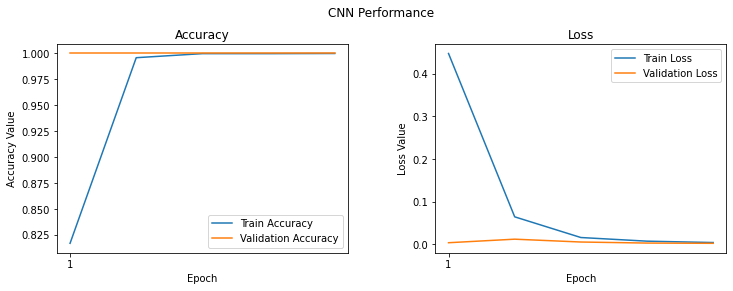

In [16]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [17]:

#Save the model
model.save('CT_cnn.h5')